# English Premier League (EPL) Pythagorean Predictor

## Step 1

In [1]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


## Step 2

In [3]:
# Create variable that keeps track of wins, losses, and draws

EPL18['HomeWins'] = np.where(EPL18['FTR'] == 'H', 1, np.where(EPL18['FTR'] == 'D', 0.5, 0))
EPL18['AwayWins'] = np.where(EPL18['FTR'] == 'A', 1, np.where(EPL18['FTR'] == 'D', 0.5, 0))
EPL18['count'] = 1
EPL18.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeWins,AwayWins,count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1


## Step 3

In [4]:
# Create two dataframes (one for 2017, one for 2018)

EPL_2017 = EPL18[EPL18.Date < 20180000]
EPL_2018 = EPL18[EPL18.Date > 20180000]

## Step 4 (2017 home team)

In [5]:
# Create aggregated data for 2017 home teams

home_2017 = EPL_2017.groupby('HomeTeam')['count', 'HomeWins', 'FTHG', 'FTAG'].sum().reset_index()
home_2017

,HomeTeam,count,HomeWins,FTHG,FTAG
0,Arsenal,10,8.5,25,10
1,Bournemouth,11,4.5,14,17
2,Brighton,10,5.5,10,12
3,Burnley,10,6.0,7,6
4,Chelsea,11,8.5,21,7
5,Crystal Palace,11,5.0,14,18
6,Everton,10,6.5,17,13
7,Huddersfield,11,6.0,10,12
8,Leicester,10,5.0,13,14
9,Liverpool,11,8.5,21,4


## Step 5 (2017 away team)

In [6]:
# Create aggregated data for 2017 away teams

away_2017 = EPL_2017.groupby('AwayTeam')['count', 'AwayWins', 'FTHG', 'FTAG'].sum().reset_index()
away_2017

,AwayTeam,count,AwayWins,FTHG,FTAG
0,Arsenal,11,5.0,16,13
1,Bournemouth,10,3.0,15,6
2,Brighton,11,3.0,13,5
3,Burnley,11,6.5,11,11
4,Chelsea,10,7.0,7,18
5,Crystal Palace,10,2.5,14,4
6,Everton,11,3.5,19,8
7,Huddersfield,10,3.0,20,8
8,Leicester,11,5.0,18,18
9,Liverpool,10,6.5,20,27


## Step 6 (2017 teams)

In [7]:
# Rename aggregate variables to denote home or away team

home_2017.rename(columns = {'HomeTeam': 'team', 'count': 'count_h17', 'HomeWins': 'wins_h17', 'FTHG': 'goalsscored_h17', 'FTAG': 'goalsallowed_h17'}, inplace = True)
away_2017.rename(columns = {'AwayTeam': 'team', 'count': 'count_a17', 'AwayWins': 'wins_a17', 'FTHG': 'goalsscored_a17', 'FTAG': 'goalsallowed_a17'}, inplace = True)

In [8]:
# Merge dataframes

predictor_2017 = pd.merge(home_2017, away_2017, on = 'team')
predictor_2017

,team,count_h17,wins_h17,goalsscored_h17,goalsallowed_h17,count_a17,wins_a17,goalsscored_a17,goalsallowed_a17
0,Arsenal,10,8.5,25,10,11,5.0,16,13
1,Bournemouth,11,4.5,14,17,10,3.0,15,6
2,Brighton,10,5.5,10,12,11,3.0,13,5
3,Burnley,10,6.0,7,6,11,6.5,11,11
4,Chelsea,11,8.5,21,7,10,7.0,7,18
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4
6,Everton,10,6.5,17,13,11,3.5,19,8
7,Huddersfield,11,6.0,10,12,10,3.0,20,8
8,Leicester,10,5.0,13,14,11,5.0,18,18
9,Liverpool,11,8.5,21,4,10,6.5,20,27


In [9]:
# Sum values of home and away wins, games, and goals scored and allowed

predictor_2017['W17'] = predictor_2017['wins_h17'] + predictor_2017['wins_a17']
predictor_2017['G17'] = predictor_2017['count_h17'] + predictor_2017['count_a17']
predictor_2017['GS17'] = predictor_2017['goalsscored_h17'] + predictor_2017['goalsscored_a17']
predictor_2017['GA17'] = predictor_2017['goalsallowed_h17'] + predictor_2017['goalsallowed_a17']

predictor_2017

,team,count_h17,wins_h17,goalsscored_h17,goalsallowed_h17,count_a17,wins_a17,goalsscored_a17,goalsallowed_a17,W17,G17,GS17,GA17
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,41,23
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,29,23
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,23,17
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,28,25
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,28,22
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,36,21
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,30,20
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,41,31


In [10]:
# Create win percentage and Pythagorean expectation for 2017 teams

predictor_2017['wpc17'] = predictor_2017['W17'] / predictor_2017['G17']
predictor_2017['pyth17'] = predictor_2017['GS17'] ** 2 / (predictor_2017['GS17'] ** 2 + predictor_2017['GA17'] ** 2)

predictor_2017

,team,count_h17,wins_h17,goalsscored_h17,goalsallowed_h17,count_a17,wins_a17,goalsscored_a17,goalsallowed_a17,W17,G17,GS17,GA17,wpc17,pyth17
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,41,23,0.642857,0.760633
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,29,23,0.357143,0.613869
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,23,17,0.404762,0.646699
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17,0.595238,0.528548
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,28,25,0.738095,0.556423
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,28,22,0.357143,0.618297
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,36,21,0.476190,0.746114
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,30,20,0.428571,0.692308
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32,0.476190,0.484131
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,41,31,0.714286,0.636260


## Optional steps, not required for Assessment 
### (Uncomment to run)

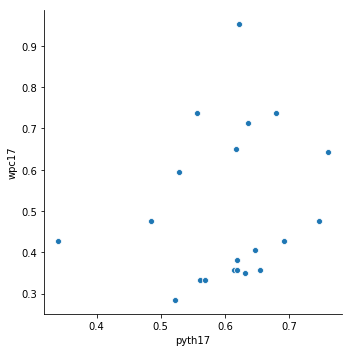

In [11]:
# Plot the data

sns.relplot(x = "pyth17", y = "wpc17", data = predictor_2017)

In [12]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc17 ~ pyth17', data = predictor_2017).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc17   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.6440
Date:                Thu, 12 Jun 2025   Prob (F-statistic):              0.433
Time:                        19:29:44   Log-Likelihood:                 6.4603
No. Observations:                  20   AIC:                            -8.921
Df Residuals:                      18   BIC:                            -6.929
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2808      0.276      1.016      0.323      -0.300       0.861
pyth17         0.3624      0.452      0.802      0.433      -0.586       1.311
==============================================================================
Omnibus:                        3.693   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.701
Skew:                           0.896   Prob(JB):                        0.259
Kurtosis:                       2.836   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 7 (=Step 4 ( 2018 home team))

In [13]:
# Create aggregated data for 2018 home teams

home_2018 = EPL_2018.groupby('HomeTeam')['count', 'HomeWins', 'FTHG', 'FTAG'].sum().reset_index()
home_2018

,HomeTeam,count,HomeWins,FTHG,FTAG
0,Arsenal,9,7.5,29,10
1,Bournemouth,8,5.0,12,13
2,Brighton,9,5.5,14,13
3,Burnley,9,3.5,9,11
4,Chelsea,8,4.5,9,9
5,Crystal Palace,8,4.5,15,9
6,Everton,9,5.5,11,9
7,Huddersfield,8,2.5,6,13
8,Leicester,9,5.0,12,8
9,Liverpool,8,7.0,24,6


## Step 7 (=Step 5 (away team))

In [14]:
# Create aggregated data for 2018 away teams

away_2018 = EPL_2018.groupby('AwayTeam')['count', 'AwayWins', 'FTHG', 'FTAG'].sum().reset_index()
away_2018

,AwayTeam,count,AwayWins,FTHG,FTAG
0,Arsenal,8,1.0,15,7
1,Bournemouth,9,4.0,16,13
2,Brighton,8,1.5,16,5
3,Burnley,8,4.0,11,9
4,Chelsea,9,4.5,15,14
5,Crystal Palace,9,4.5,14,12
6,Everton,8,2.5,17,8
7,Huddersfield,9,2.5,13,4
8,Leicester,8,2.5,20,13
9,Liverpool,9,5.0,8,12


## Step 7 (=Step 6 (away team))

In [15]:
# Rename aggregate variables to denote home or away team

home_2018.rename(columns = {'HomeTeam': 'team', 'count': 'count_h18', 'HomeWins': 'wins_h18', 'FTHG': 'goalsscored_h18', 'FTAG': 'goalsallowed_h18'}, inplace = True)
away_2018.rename(columns = {'AwayTeam': 'team', 'count': 'count_a18', 'AwayWins': 'wins_a18', 'FTHG': 'goalsscored_a18', 'FTAG': 'goalsallowed_a18'}, inplace = True)

In [16]:
# Merge dataframes

predictor_2018 = pd.merge(home_2018, away_2018, on = 'team')
predictor_2018

,team,count_h18,wins_h18,goalsscored_h18,goalsallowed_h18,count_a18,wins_a18,goalsscored_a18,goalsallowed_a18
0,Arsenal,9,7.5,29,10,8,1.0,15,7
1,Bournemouth,8,5.0,12,13,9,4.0,16,13
2,Brighton,9,5.5,14,13,8,1.5,16,5
3,Burnley,9,3.5,9,11,8,4.0,11,9
4,Chelsea,8,4.5,9,9,9,4.5,15,14
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12
6,Everton,9,5.5,11,9,8,2.5,17,8
7,Huddersfield,8,2.5,6,13,9,2.5,13,4
8,Leicester,9,5.0,12,8,8,2.5,20,13
9,Liverpool,8,7.0,24,6,9,5.0,8,12


In [17]:
# Sum values of home and away wins, games, and goals scored and allowed

predictor_2018['W18'] = predictor_2018['wins_h18'] + predictor_2018['wins_a18']
predictor_2018['G18'] = predictor_2018['count_h18'] + predictor_2018['count_a18']
predictor_2018['GS18'] = predictor_2018['goalsscored_h18'] + predictor_2018['goalsscored_a18']
predictor_2018['GA18'] = predictor_2018['goalsallowed_h18'] + predictor_2018['goalsallowed_a18']

predictor_2018

,team,count_h18,wins_h18,goalsscored_h18,goalsallowed_h18,count_a18,wins_a18,goalsscored_a18,goalsallowed_a18,W18,G18,GS18,GA18
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,44,17
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,28,26
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,30,18
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,20,20
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,24,23
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,29,21
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,28,17
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,19,17
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,32,21
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,32,18


In [18]:
# Create win percentage and Pythagorean expectation for 2018 teams

predictor_2018['wpc18'] = predictor_2018['W18'] / predictor_2018['G18']
predictor_2018['pyth18'] = predictor_2018['GS18'] ** 2 / (predictor_2018['GS18'] ** 2 + predictor_2018['GA18'] ** 2)

predictor_2018

,team,count_h18,wins_h18,goalsscored_h18,goalsallowed_h18,count_a18,wins_a18,goalsscored_a18,goalsallowed_a18,W18,G18,GS18,GA18,wpc18,pyth18
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,44,17,0.500000,0.870112
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,28,26,0.529412,0.536986
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,30,18,0.411765,0.735294
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,20,20,0.441176,0.500000
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,24,23,0.529412,0.521267
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,29,21,0.529412,0.656006
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,28,17,0.470588,0.730662
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,19,17,0.294118,0.555385
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,32,21,0.441176,0.698976
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,32,18,0.705882,0.759644


## Optional steps, not required for Assessment
### (Uncomment to run)

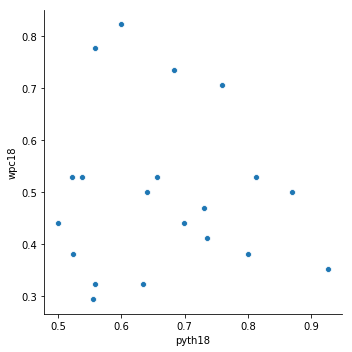

In [19]:
# Plot the data

sns.relplot(x = "pyth18", y = "wpc18", data = predictor_2018)

In [20]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc18 ~ pyth18', data = predictor_2018).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc18   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                   0.06816
Date:                Thu, 12 Jun 2025   Prob (F-statistic):              0.797
Time:                        19:29:45   Log-Likelihood:                 9.5443
No. Observations:                  20   AIC:                            -15.09
Df Residuals:                      18   BIC:                            -13.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5497      0.197      2.792      0.012       0.136       0.963
pyth18        -0.0760      0.291     -0.261      0.797      -0.688       0.536
==============================================================================
Omnibus:                        2.291   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.819
Skew:                           0.705   Prob(JB):                        0.403
Kurtosis:                       2.556   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 8

In [21]:
# Merge 2017 and 2018 dataframes

EPL18 = pd.merge(predictor_2017, predictor_2018, on = 'team')
EPL18

,team,count_h17,wins_h17,goalsscored_h17,goalsallowed_h17,count_a17,wins_a17,goalsscored_a17,goalsallowed_a17,W17,...,count_a18,wins_a18,goalsscored_a18,goalsallowed_a18,W18,G18,GS18,GA18,wpc18,pyth18
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,...,8,1.0,15,7,8.5,17,44,17,0.500000,0.870112
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,...,9,4.0,16,13,9.0,17,28,26,0.529412,0.536986
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,...,8,1.5,16,5,7.0,17,30,18,0.411765,0.735294
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,...,8,4.0,11,9,7.5,17,20,20,0.441176,0.500000
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,...,9,4.5,15,14,9.0,17,24,23,0.529412,0.521267
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,...,9,4.5,14,12,9.0,17,29,21,0.529412,0.656006
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,...,8,2.5,17,8,8.0,17,28,17,0.470588,0.730662
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,...,9,2.5,13,4,5.0,17,19,17,0.294118,0.555385
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,...,8,2.5,20,13,7.5,17,32,21,0.441176,0.698976
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,...,9,5.0,8,12,12.0,17,32,18,0.705882,0.759644


## Step 9

In [24]:
# Generate confusion matrix of win percentages and Pythagorean expectations for 2017 and 2018

keyvars = EPL18[['team', 'wpc18', 'wpc17', 'pyth17', 'pyth18']]
keyvars.corr()

,wpc18,wpc17,pyth17,pyth18
wpc18,1.000000,0.756573,0.221756,-0.061421
wpc17,0.756573,1.000000,0.185849,-0.126612
pyth17,0.221756,0.185849,1.000000,-0.193862
pyth18,-0.061421,-0.126612,-0.193862,1.000000


## Optional steps, not required for Assessment
### (Uncomment to run)

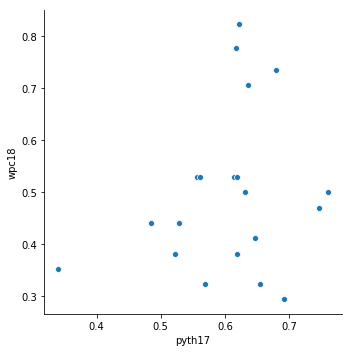

In [25]:
sns.relplot(x = "pyth17", y = "wpc18", data = EPL18)

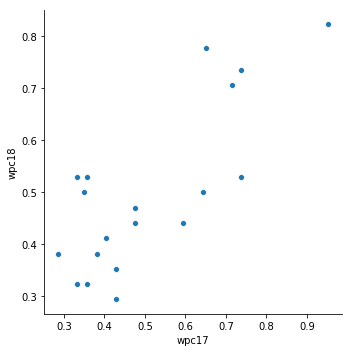

In [26]:
sns.relplot(x = "wpc17", y = "wpc18", data = EPL18)

Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?

**There really isn't much of a correlation between the win percentage of one year and the Pythagorean expectation of the next, despite a somewhat upward curve in the plots. Unlike a sport like baseball, soccer can be determined by the winning team scoring just one goal, or the game could involve more scoring. There are even negative correlations between the win percentage and the Pythagorean expectation of the second year.**